In [ ]:
from google.colab import drive
import pandas as pd
import spacy
import nltk 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import gensim
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/resume_filter/csvs/content1.csv',index_col=False)

In [ ]:
df.head()

,content,label,lowercase,urlremoval,html_tag,rmpunc,rmemoji,tokens,lemma,rmstopwords,rm_freq_word,rm_rare_words
0,\nPROFILE \n \n• Having 8+ years of busines...,0,\nprofile \n \n• having 8+ years of busines...,\nprofile \n \n• having 8+ years of busines...,\nprofile \n \n• having 8+ years of busines...,profile • having 8 years of business acume...,profile having 8 years of business acume...,"['profile', 'having', '8', 'years', 'of', 'bus...",profile having 8 year of business acumen a dat...,"['profile', 'having', '8', 'year', 'of', 'busi...","['acumen', 'analystanalytics', 'larger', 'stak...","['profile', 'having', '8', 'year', 'of', 'busi..."
1, +91 96373 37939\n shwetadinde@gmail.com\n ...,0, +91 96373 37939\n shwetadinde@gmail.com\n ..., +91 96373 37939\n shwetadinde@gmail.com\n ..., +91 96373 37939\n shwetadinde@gmail.com\n ..., 91 96373 37939 shwetadindegmailcom pune in...,91 96373 37939 shwetadindegmailcom pune in...,"['91', '96373', '37939', 'shwetadindegmailcom'...",91 96373 37939 shwetadindegmailcom pune in lin...,"['91', '96373', '37939', 'shwetadindegmailcom'...","['96373', '37939', 'shwetadindegmailcom', 'lin...","['91', 'pune', 'in', 'qc', 'engineer', 'and', ..."
2,DEV JOYDEB GUHA\nB. Tech. - Electronics & Comm...,0,dev joydeb guha\nb. tech. - electronics & comm...,dev joydeb guha\nb. tech. - electronics & comm...,dev joydeb guha\nb. tech. - electronics & comm...,dev joydeb guhab tech electronics communicat...,dev joydeb guhab tech electronics communicat...,"['dev', 'joydeb', 'guhab', 'tech', 'electronic...",dev joydeb guhab tech electronics communicatio...,"['dev', 'joydeb', 'guhab', 'tech', 'electronic...","['dev', 'joydeb', 'guhab', 'mit', 'wpuph', '91...","['tech', 'electronics', 'communication', 'engi..."
3,Mahajan Bhushan Dyaneshwar \n\nEmail: bhushanm...,0,mahajan bhushan dyaneshwar \n\nemail: bhushanm...,mahajan bhushan dyaneshwar \n\nemail: bhushanm...,mahajan bhushan dyaneshwar \n\nemail: bhushanm...,mahajan bhushan dyaneshwar email bhushanmahaja...,mahajan bhushan dyaneshwar email bhushanmahaja...,"['mahajan', 'bhushan', 'dyaneshwar', 'email', ...",mahajan bhushan dyaneshwar email bhushanmahaja...,"['mahajan', 'bhushan', 'dyaneshwar', 'email', ...","['mahajan', 'bhushan', 'dyaneshwar', 'bhushanm...","['mahajan', 'email', 'ph', 'no', 'dob', 'linke..."
4,SHUBHANKAR GAYAL\n\nsgayal13@gmail.com\n\n800...,0,shubhankar gayal\n\nsgayal13@gmail.com\n\n800...,shubhankar gayal\n\nsgayal13@gmail.com\n\n800...,shubhankar gayal\n\nsgayal13@gmail.com\n\n800...,shubhankar gayalsgayal13gmailcom8007989189f...,shubhankar gayal sgayal13gmailcom8007989189 fl...,"['shubhankar', 'gayal', 'sgayal13gmailcom80079...",shubhankar gayal sgayal13gmailcom8007989189 fl...,"['shubhankar', 'gayal', 'sgayal13gmailcom80079...","['shubhankar', 'gayal', 'sgayal13gmailcom80079...","['apt', 'near', 'am', 'looking', 'for', 'a', '..."


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def word_freq(df):
    
    word_frequency = {}
    tokens = []
    for i in range(len(df)):
        text = df['content'][i]
        text = re.sub('\n',' ',text)
        text = re.sub('\W+',' ',text)
        text= text.lower()
        doc = word_tokenize(text)
        for token in doc:
            tokens.append(token)
            if token in word_frequency.keys():
                word_frequency[token] = word_frequency[token] + 1
            else:
                word_frequency[token] = 1
    return word_frequency,tokens

In [ ]:
word_freq,tokens = word_freq(df)

In [ ]:
frequency_dist = nltk.FreqDist(tokens)
frequency_dist1 = nltk.FreqDist(updated_tokens)

In [ ]:
vocabulary = set(tokens)
print(len(vocabulary))

10614


In [ ]:
vocabulary = set(updated_tokens)
print(len(vocabulary))

10490


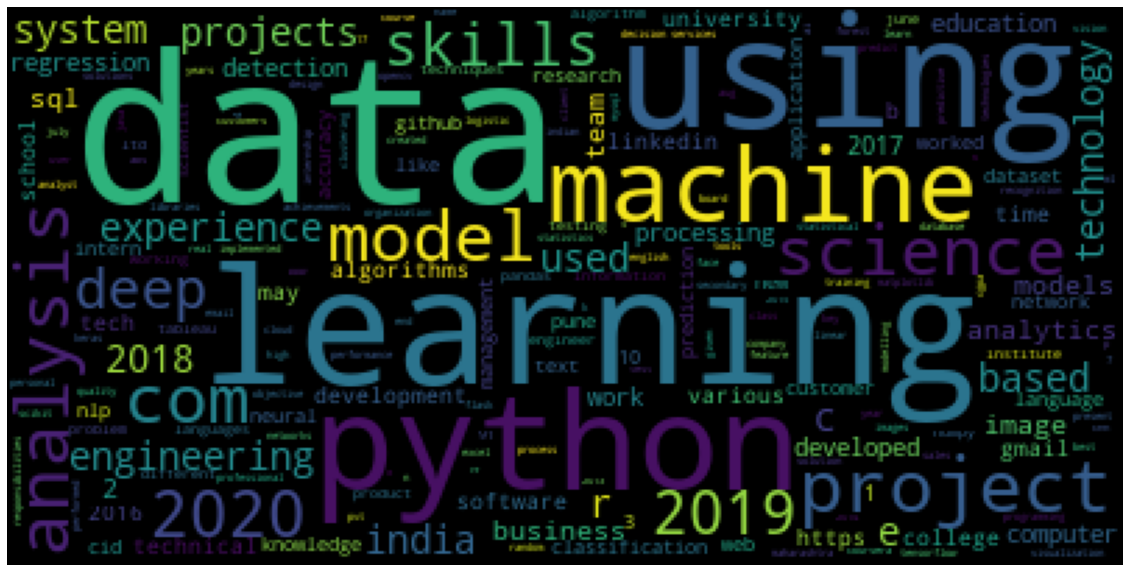

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def data_split(x,
               y,
               test_size=0.1,
               random_state=42,
               shuffle=True):
    
    xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)
    return xtrain,xvalid,ytrain,yvalid

In [ ]:
xtrain,xvalid,ytrain,yvalid = data_split(df.rm_freq_word.values,df.label.values)

In [ ]:
print(xtrain.shape)
print(xvalid.shape)

(158,)
(18,)


In [ ]:
xtrain[0]

'Shubham Wakchaure\n\nwakchaure@outlook.in \n9511658980 \nPimple Nilakh \nPune, Maharashtra\n\nSelf-motivated computer science engineer with keen interest in Coding, Cloud, Big Data. I\nintend to be part of a organization where I can constantly learn and develop my technical and\nmanagement skills and make best use of it for growth of the organization.\n\nSecondary\nVidyapeeth Highschool • Pune, Maharashtra\n03/2014\n\nHigher Secondary\nBharat English School • Pune, Maharashtra\n02/2016\n\nComputer Science\nDr. D. Y. Patil Institute of Technology • Pimpri, Maharashtra\n11/2020\n\n89.60%\n\n68.46%\n\n68.75%\n\nSQL\nJava\n\nMachine Learning\nPython\n\nMachine Learning by Andrew Ng, Coursera, 2019\n\nDesigning Event-driven Applications Using Apache Kafka Ecosystem, Pluralsight, 2020\n\nIntroduction to Cloud Computing on AWS, Udemy, 2020\n\nApache Spark Fundamentals, Pluralsight, 2020\n\nSpam Mail Classiﬁer (R, R Shiny): Used the Naive Bayes Method to approximate the likelihood\na message 

In [ ]:
def convert_tf_idf(xtrain,xvalid):
    # tfv = TfidfVectorizer(min_df=3,  max_features=None, 
    #             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
    #             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
    #             stop_words = 'english')
    
    # Always start with these features. They work (almost) everytime!
    tfv = TfidfVectorizer(min_df=3,  max_features=None, 
                strip_accents='unicode', analyzer='word',
                ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                stop_words = 'english')
    
    # Fitting TF-IDF to both training and test sets (semi-supervised learning)
    tfv.fit(list(xtrain) + list(xvalid))
    xtrain_tfv =  tfv.transform(xtrain) 
    xvalid_tfv = tfv.transform(xvalid)
    
    return xtrain_tfv,xvalid_tfv

In [ ]:
def multiple_classifier(classifiers,
                        xtrain_tfv,
                        xvalid_tfv,
                        ytrain,
                        yvalid,
                       log_cols=["Classifier", "Accuracy", "Log Loss","AUC","Confusion Matrix"]):
    
    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)
    for clf in classifiers:

        name = clf.__class__.__name__
        if name == 'GradientBoostingClassifier' or 'GaussianNB':
          clf.fit(xtrain_tfv.toarray(),ytrain)
        else:
          clf.fit(xtrain_tfv, ytrain)


        print("="*30)
        print(name)

        print('****Results****')
        if name == 'GradientBoostingClassifier' or 'GaussianNB':
          train_predictions = clf.predict(xvalid_tfv.toarray())
        else:
          train_predictions = clf.predict(xvalid_tfv)
        acc = accuracy_score(yvalid, train_predictions)
        print("Accuracy: {:.4%}".format(acc))

        if name == 'GradientBoostingClassifier' or 'GaussianNB':
          train_predictions = clf.predict_proba(xvalid_tfv.toarray())
        else:
          train_predictions = clf.predict_proba(xvalid_tfv.toarray())
        ll = log_loss(yvalid, train_predictions)
        print("Log Loss: {}".format(ll))

        #y_valid1 = [np.argmax(yvalid[i]) for  i in range(len(yvalid))]
        train_predictions1 = [np.argmax(train_predictions[i]) for i in range(len(train_predictions))]

        roc = roc_auc_score(yvalid,train_predictions1)
        print(f'AUC score: {roc}')

        train_predictions1 = [np.argmax(train_predictions[i]) for i in range(len(train_predictions))]
        confusion_matrix1 = confusion_matrix(yvalid, train_predictions1)
        print(f'Confusion Matrix: {confusion_matrix1}')
        
        log_entry = pd.DataFrame([[name, acc*100, ll,roc,confusion_matrix1]], columns=log_cols)
        log = log.append(log_entry)

        print("="*30)
        
    return log

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

log_cols = ["Classifier", "Accuracy", "Log Loss","AUC","Confusion Matrix"]